In [1]:
# https://www.kaggle.com/shayanfazeli/heartbeat   # data set 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt # plotting
import os
import sklearn
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import scipy
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate

Using TensorFlow backend.


In [2]:
# reading csv file  

test=pd.read_csv("mitbih_test.csv",header=None) 
train=pd.read_csv("mitbih_train.csv",header=None) 
#Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# N- normal, S-supraventricular, V-ventricular, F-fusion, Q- unknown

#print("Type\tCount")
#print((train[187]).value_counts())

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((train[187]).value_counts())

print('*************************************')

print('Count of all classes in trainining dataset')
print("Type\tCount")
print((test[187]).value_counts())

Count of all classes in trainining dataset
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
*************************************
Count of all classes in trainining dataset
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


In [3]:
print("train shape : ",train.shape)
print("test shape : ",test.shape)

feature_train=train.iloc[:,0:187] 
print("feature_train shape : ",feature_train.shape)

labels_train=train.iloc[:,187] 
print("labels_train shape : ",labels_train.shape)

feature_test=test.iloc[:,0:187] 
print("feature_test shape : ",feature_test.shape)

labels_test=test.iloc[:,187] 
print("labels_test shape : ",labels_test.shape)
      


train shape :  (87554, 188)
test shape :  (21892, 188)
feature_train shape :  (87554, 187)
labels_train shape :  (87554,)
feature_test shape :  (21892, 187)
labels_test shape :  (21892,)


In [4]:
from sklearn.preprocessing import StandardScaler
standardized_training_data=StandardScaler().fit_transform(feature_train)
feature_train=standardized_training_data

standardized_test_data=StandardScaler().fit_transform(feature_test)
feature_test=standardized_test_data

In [5]:
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
#from keras.initializers import glorot_normal

In [6]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [7]:
# here we are having a class number for each image
print("Class label of first image :", labels_train[83456])

Y_train = np_utils.to_categorical(labels_train)
print("After converting the output into a vector : ",Y_train[83456])

Y_test = np_utils.to_categorical(labels_test)

Class label of first image : 4.0
After converting the output into a vector :  [0. 0. 0. 0. 1.]


In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

output_dim = 5
input_dim = feature_train.shape[1]

#batch_size = 128 
#nb_epoch = 20

batch_size = 512
nb_epoch = 500

In [9]:
print("feature_train",feature_train.shape)
print("Y_train",Y_train)
print("feature_test",feature_test.shape)
print("Y_test",Y_test.shape)

feature_train (87554, 187)
Y_train [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
feature_test (21892, 187)
Y_test (21892, 5)


In [10]:
# 4. MLP + ReLU +SGD

# Multilayer perceptron

model_relu = Sequential()
model_relu.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model_relu.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.125, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               24064     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 32,645
Trainable params: 32,645
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_relu.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(feature_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(feature_test, Y_test))


Train on 87554 samples, validate on 21892 samples
Epoch 1/500
87554/87554 [==============================] - 1s 12us/step - loss: 0.5862 - accuracy: 0.8393 - val_loss: 0.4316 - val_accuracy: 0.8895
Epoch 2/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.3818 - accuracy: 0.9018 - val_loss: 0.3563 - val_accuracy: 0.9080
Epoch 3/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.3266 - accuracy: 0.9155 - val_loss: 0.3169 - val_accuracy: 0.9193
Epoch 4/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.2939 - accuracy: 0.9224 - val_loss: 0.2880 - val_accuracy: 0.9244
Epoch 5/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2709 - accuracy: 0.9274 - val_loss: 0.2686 - val_accuracy: 0.9290
Epoch 6/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.2535 - accuracy: 0.9313 - val_loss: 0.2551 - val_accuracy: 0.9308
Epoch 7/500
87554/87554 [==============================] - 1s

87554/87554 [==============================] - 1s 10us/step - loss: 0.1127 - accuracy: 0.9688 - val_loss: 0.1257 - val_accuracy: 0.9650
Epoch 55/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.1118 - accuracy: 0.9690 - val_loss: 0.1275 - val_accuracy: 0.9656
Epoch 56/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.1114 - accuracy: 0.9693 - val_loss: 0.1244 - val_accuracy: 0.9653
Epoch 57/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.1104 - accuracy: 0.9696 - val_loss: 0.1239 - val_accuracy: 0.9656
Epoch 58/500
87554/87554 [==============================] - 1s 11us/step - loss: 0.1096 - accuracy: 0.9697 - val_loss: 0.1242 - val_accuracy: 0.9653
Epoch 59/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.1089 - accuracy: 0.9698 - val_loss: 0.1225 - val_accuracy: 0.9659
Epoch 60/500
87554/87554 [==============================] - 1s 10us/step - loss: 0.1081 - accuracy: 0.9700 - val_loss: 

Epoch 109/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0854 - accuracy: 0.9761 - val_loss: 0.1064 - val_accuracy: 0.9714
Epoch 110/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0850 - accuracy: 0.9760 - val_loss: 0.1072 - val_accuracy: 0.9708
Epoch 111/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0848 - accuracy: 0.9763 - val_loss: 0.1060 - val_accuracy: 0.9713
Epoch 112/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0844 - accuracy: 0.9763 - val_loss: 0.1058 - val_accuracy: 0.9713
Epoch 113/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0841 - accuracy: 0.9762 - val_loss: 0.1154 - val_accuracy: 0.9687
Epoch 114/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0842 - accuracy: 0.9762 - val_loss: 0.1052 - val_accuracy: 0.9717
Epoch 115/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0835 - accuracy:

87554/87554 [==============================] - 2s 20us/step - loss: 0.0714 - accuracy: 0.9800 - val_loss: 0.1021 - val_accuracy: 0.9730
Epoch 164/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0714 - accuracy: 0.9800 - val_loss: 0.0986 - val_accuracy: 0.9731
Epoch 165/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0711 - accuracy: 0.9800 - val_loss: 0.1292 - val_accuracy: 0.9637
Epoch 166/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0719 - accuracy: 0.9797 - val_loss: 0.6489 - val_accuracy: 0.8184
Epoch 167/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0791 - accuracy: 0.9775 - val_loss: 0.0993 - val_accuracy: 0.9730
Epoch 168/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0712 - accuracy: 0.9800 - val_loss: 0.0988 - val_accuracy: 0.9731
Epoch 169/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0707 - accuracy: 0.9802 - val_

Epoch 218/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0642 - accuracy: 0.9812 - val_loss: 0.0951 - val_accuracy: 0.9745
Epoch 219/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0640 - accuracy: 0.9813 - val_loss: 0.0949 - val_accuracy: 0.9741
Epoch 220/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0637 - accuracy: 0.9816 - val_loss: 0.0960 - val_accuracy: 0.9742
Epoch 221/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.0635 - accuracy: 0.9813 - val_loss: 0.0948 - val_accuracy: 0.9748
Epoch 222/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.0632 - accuracy: 0.9816 - val_loss: 0.0946 - val_accuracy: 0.9746
Epoch 223/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0630 - accuracy: 0.9818 - val_loss: 0.1309 - val_accuracy: 0.9619
Epoch 224/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0633 - accuracy:

87554/87554 [==============================] - 2s 19us/step - loss: 0.0552 - accuracy: 0.9839 - val_loss: 0.0928 - val_accuracy: 0.9751
Epoch 273/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0551 - accuracy: 0.9839 - val_loss: 0.0928 - val_accuracy: 0.9751
Epoch 274/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.0549 - accuracy: 0.9839 - val_loss: 0.0968 - val_accuracy: 0.9743
Epoch 275/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0549 - accuracy: 0.9839 - val_loss: 0.0931 - val_accuracy: 0.9750
Epoch 276/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0547 - accuracy: 0.9838 - val_loss: 0.1023 - val_accuracy: 0.9723
Epoch 277/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0550 - accuracy: 0.9838 - val_loss: 0.0977 - val_accuracy: 0.9749
Epoch 278/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.0548 - accuracy: 0.9838 - val_

Epoch 327/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0491 - accuracy: 0.9854 - val_loss: 0.0922 - val_accuracy: 0.9760
Epoch 328/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0489 - accuracy: 0.9856 - val_loss: 0.0957 - val_accuracy: 0.9754
Epoch 329/500
87554/87554 [==============================] - 2s 22us/step - loss: 0.0490 - accuracy: 0.9855 - val_loss: 0.0932 - val_accuracy: 0.9759
Epoch 330/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0487 - accuracy: 0.9856 - val_loss: 0.0927 - val_accuracy: 0.9759
Epoch 331/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0925 - val_accuracy: 0.9762
Epoch 332/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0921 - val_accuracy: 0.9762
Epoch 333/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0485 - accuracy:

87554/87554 [==============================] - 2s 22us/step - loss: 0.0441 - accuracy: 0.9867 - val_loss: 0.0912 - val_accuracy: 0.9770
Epoch 382/500
87554/87554 [==============================] - 2s 25us/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.0923 - val_accuracy: 0.9766
Epoch 383/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0439 - accuracy: 0.9867 - val_loss: 0.0919 - val_accuracy: 0.9768
Epoch 384/500
87554/87554 [==============================] - 2s 21us/step - loss: 0.0439 - accuracy: 0.9869 - val_loss: 0.0918 - val_accuracy: 0.9767
Epoch 385/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0920 - val_accuracy: 0.9766
Epoch 386/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0436 - accuracy: 0.9870 - val_loss: 0.0926 - val_accuracy: 0.9762
Epoch 387/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0436 - accuracy: 0.9869 - val_

87554/87554 [==============================] - 2s 19us/step - loss: 0.0397 - accuracy: 0.9882 - val_loss: 0.0928 - val_accuracy: 0.9767
Epoch 436/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0395 - accuracy: 0.9884 - val_loss: 0.0923 - val_accuracy: 0.9773
Epoch 437/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.1808 - val_accuracy: 0.9601
Epoch 438/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0430 - accuracy: 0.9876 - val_loss: 0.0941 - val_accuracy: 0.9771
Epoch 439/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.0939 - val_accuracy: 0.9767
Epoch 440/500
87554/87554 [==============================] - 2s 20us/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0928 - val_accuracy: 0.9771
Epoch 441/500
87554/87554 [==============================] - 2s 17us/step - loss: 0.0392 - accuracy: 0.9884 - val_

Epoch 490/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0362 - accuracy: 0.9892 - val_loss: 0.0962 - val_accuracy: 0.9773
Epoch 491/500
87554/87554 [==============================] - 2s 23us/step - loss: 0.0359 - accuracy: 0.9894 - val_loss: 0.0942 - val_accuracy: 0.9773
Epoch 492/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0359 - accuracy: 0.9895 - val_loss: 0.0936 - val_accuracy: 0.9773
Epoch 493/500
87554/87554 [==============================] - 1s 17us/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.0936 - val_accuracy: 0.9768
Epoch 494/500
87554/87554 [==============================] - 1s 16us/step - loss: 0.0358 - accuracy: 0.9893 - val_loss: 0.1071 - val_accuracy: 0.9726
Epoch 495/500
87554/87554 [==============================] - 2s 19us/step - loss: 0.0359 - accuracy: 0.9894 - val_loss: 0.0925 - val_accuracy: 0.9774
Epoch 496/500
87554/87554 [==============================] - 2s 18us/step - loss: 0.0355 - accuracy:

In [12]:
y_pred = model_relu.predict(feature_test, batch_size=512)
print(classification_report(Y_test.argmax(axis=1), y_pred.argmax(axis=1)))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99     18118
           1       0.87      0.70      0.78       556
           2       0.95      0.92      0.93      1448
           3       0.79      0.65      0.71       162
           4       0.98      0.97      0.98      1608

    accuracy                           0.98     21892
   macro avg       0.91      0.85      0.88     21892
weighted avg       0.98      0.98      0.98     21892



Test score: 0.09430224171381225
Test accuracy: 0.9774346947669983


<IPython.core.display.Javascript object>


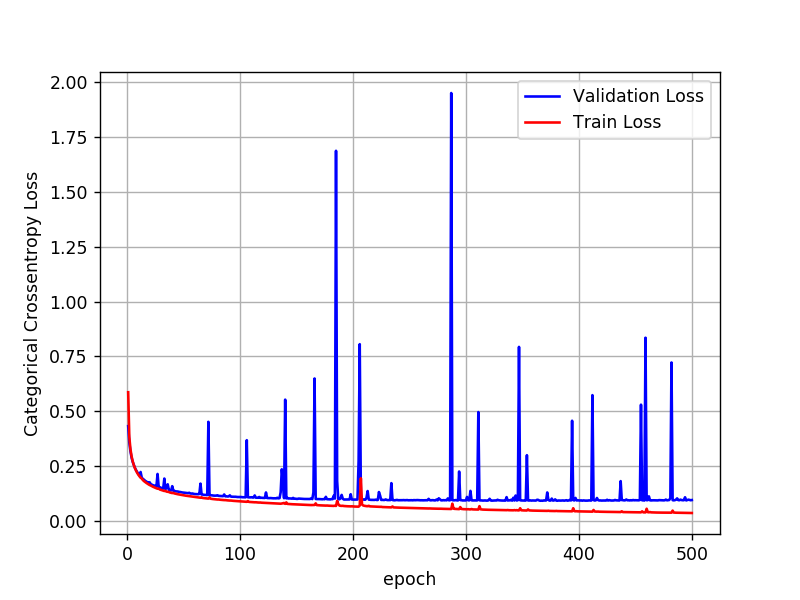

In [13]:
score = model_relu.evaluate(feature_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [14]:
#              precision    recall  f1-score   support
#
#           0       0.98      0.99      0.99     18118
#           1       0.87      0.70      0.78       556
#           2       0.95      0.92      0.93      1448
#           3       0.79      0.65      0.71       162
#           4       0.98      0.97      0.98      1608

#    accuracy                           0.98     21892
#   macro avg       0.91      0.85      0.88     21892
# weighted avg       0.98      0.98      0.98     21892

# Test score: 0.09430224171381225
# Test accuracy: 0.9774346947669983